## 那些年, 大牛的卷积网络
1. 卷积网络:
    - 尝试解决全连接层的局限:
        - 因为全连接层按行展开, 难于识别相距较远的 模式 -> 卷积层保留输入形状, 使得图像的像素在高和宽两个方向上的相关性可能被识别;
        - 全连接层模型容易过大 -> 卷积层通过滑动窗口, 和不同位置的输入做卷积计算, 避免参数尺寸过大

### Lenet
0. 1998年
1. 交叉使用两个模块: 卷积层 + 全连接层
2. 卷积层基本单位 = 卷积层 + 最大池化层, 卷积层识别空间模式, 池化层降低卷积层对位置的敏感性
3. 结构:
    - 卷积层块:
        - 卷积层: 5x5 -> 输出 -> sigmoid
        - 1st 卷积层 通道为 5, 2nd 为16 <- 增加通道使两个卷积层的参数尺寸类似
        - 两个 2x2 的max-pooling窗口, 步幅是2
    - 输出: (批量大小, 通道数, 高, 宽)
    - 进入全连接层: flatten 每个样本, 输入形状变成二维 -> 样本数 * flatten vectors
    - 三个全连接层: 120, 84, 10(输出类别个数, 因为是MNIST)
4. 缺点:
    - 多通道, 多层, 大量参数, 如今有GPU就不是问题
    
### AlexNet
1. end-to-end: 神经网络可以直接基于图像的原始像素进行分类
2. 那些年图像分类的特征工程, 流程:
    - 获取图像数据集
    - 使用特征提取函数生成图像的特征
    - 使用机器学习模型对图像的特征分类
3. 学习特征表示:
    - 多层神经网络可能可以学习到数据的 多级表征, 并逐级表示逐渐抽象的概念或模式
4. AlexNet 首次证明了学习到的特征可以超越手工设计的特征
5. 与leNet的不用:
    - 8层变换:
        - 5层卷积
        - 2层全连接隐藏层
        - 1层全连接输出层
    - 将sigmoid激活函数改成relu激活函数, 后者计算更简单
        - sigmoid 的缺点: 当输出极限接近0或者1时, 梯度几乎为0, 导致反向传播无法更新部分模型参数
    - 通过丢弃法控制全连接层的模型复杂福
    - 引入大量图像增广: 翻转/裁剪/颜色变化, 进一步扩大数据集来缓解过拟合
6. 结构:
    - 第一层: 11x11的卷积窗口 -> 需要大窗口捕获物体
    - 第二层: 5x5的卷积窗口
    - 第三及之后层: 3x3的卷积窗口
    - 第1/2/5层都使用了3x3, 步幅为2的最大池化层
    - 卷积层之后是两个 输出个数为4096的全连接层
9. 结构图: ![](./images/alexnet_structure.png)

### VGG
1. 实验室: Visual Geometry Group
2. 提出了通过重复使用简单的基础块来构建深度模型的思路
3. 结构:
    - 连续使用数个相同的填充为1、窗口形状为 3×3 的卷积层后接一个步幅为2、窗口形状为 2×2 的最大池化层
    - 卷积层保持输入的高和宽不变
    - 池化层则对宽高减半
    - 卷积模块后接全连接层

### NiN, 网中网
1. LeNet/AlexNet/VGG 的共同之处, 是 先使用卷积层构成的模块充分抽取空间特征, 再以 全连接层 构成的模块来输出分类 结果
2. AlexNet/VGG的改进之处在于, 将两个模块加厚(增加通道数), 加深
3. NiN的思路: 串联多个 卷积层+全连接层 的小网络来构建 一个深层网络
4. NiN使用 1x1卷积层来代替全连接层, 从而将空间信息传递到后面的层, 其中, 1x1卷积层空间维度(宽+高)上的每个元素相当于样本, 通道相当于特征
5. NiN块: 1个卷积层 + 2个 1x1卷积层
6. NiN结构:
    - 卷积层窗口形状 分别是 11, 5, 3
    - 通道数 和 alexnet 相同
    - 每个 NiN块 后接一个 步幅为2, 窗口形状为3x3的最大池化层
7. 和 AlexNet相比, 去掉了 最后三个全连接层, 最后的是 输出通道数 等于 标签类别数的 NiN 块 + 全局平均池化层
8. 优点: 显著建雄模型参数尺寸, 缓解过拟合
9. 缺点: 可能会导致获取有效模型的训练时间增加
10. <b>这是一个  参数数量 和 训练时间 的博弈</b>
11. 结构图: ![](./images/nin.png)

### GoogLeNet(含并行连接)
1. GoogLeNet吸收了NiN中网络串联网络的思想
2. Inception 块: 4条并行线路
    - 1x1 卷积层
    - 1x1 卷积层 + 3x3 卷积层(3和5抽取不同空间尺寸的信息)
    - 1x1 卷积层 + 5x5 卷积层
    - 3x3 最大池化层 + 1x1 卷积层(减少通道数, 降低复杂度)
    - 输出: 通道合并层
3. Inception 块结构: ![](./images/inception.png)
4. GoogLeNet 结构:
    - 主体卷积部分:
        - 模块1: 卷积层(64通道, 7x7) + 最大池化层(步幅=2, 3x3)
        - 模块2: 卷积层(64通道, 1x1) + 卷积层(192通道, 3x3) + 最大池化层(步幅=2, 充填=1, 3x3) , 对应 Inception的第二条线路
        - 模块3: 串联两个 Inception块 + 最大池化层(步幅=2, 填充=1, 3x3):
            - 第一个Inception, 输出通道数为256: 
                - 64
                - 96, 128
                - 16, 32
                - 32
            - 第二个Inception, 输出通道数为480:
                - 128
                - 128, 192
                - 32, 96
                - 64
        - 模块4: 5个Inception块 + 最大池化层(步幅=2, 填充=1, 3x3)
            - 第1个Inception, 输出通道数为512
                - 192
                - 96, 208
                - 16, 48
                - 64
            - 第2个Inception, 输出通道数为512
                - 160
                - 112, 224
                - 24, 64
                - 64
            - 第3个Inception, 输出通道数为512
                - 128
                - 128, 256
                - 24, 64
                - 64
            - 第4个Inception, 输出通道数为528
                - 112
                - 144, 288
                - 32, 64
                - 64
            - 第5个Inception, 输出通道数为832
                - 256
                - 160, 320
                - 32, 128
                - 128
5. Inception块的通道数分配之比 需要通过大量实验获取

        
### ResNet, 残差网络
1. 加入BN依旧未完全解决: more 层, 训练稳定的深度模型越困难, 训练误差反而可能上升
2. 加入残差网络: 输入可以跨层向前传播
3. 之前的映射: f(x); 新的残差映射: f(x) - x
4. 残差块 Residual Block, 结构:
    - 两个相同输出通道数的 3x3 卷积层 (输出形状同输入)
    - 每个卷积层后 跟着 BN
    - 加上 输入
    - 加上ReLU
    - 如果要改变 输出通道数, 则需要使用1x1 卷积层resize输入再做相加运算
5. ResNet模型
    - 卷积层(64通道, 步幅为2, 7x7) + BN + 最大池化层(步幅为2, 3x3)
    - 4个残差块
6. 相比 GoogLeNet, 结构更简单
### DenseNet
1. 从ResNet引申出来, 但是 ResNet加上输入, 而DenseNet连结输入
2. DenseNet结构:
    - 稠密块: 定义输出和输入如何连结(在通道维)
        - 卷积层 + BN + ReLU
    - 过渡层: 控制通道数(控制模型复杂度), 避免过大
        - 1x1卷积层, 减少 通道数
        - 平均池化层(步幅=2), 减半宽和高
3. 增长率(Grow Rate): 输出通道数 相对 输入通道数的增长
4. 卷积块的通道数 控制 增长率
5. DenseNet模型结构:
    - 单卷积层
    - 最大池化层
    - 4个稠密块
    - 全局平均池化层
    - 全连接层
    
### 批量归一化
1. 如果没有BN: 每层参数的更新难以导致靠近输出层的输出有剧烈变化, 这种数值的不稳定性会导致难以训练处有效的深度模型
2. 如果加了BN: 
    - BN利用小批量上的均值和标准差, 不断调整神经网络的中间输出, 使用整个神经网络在各层的中间输出的数值更稳定
    - 更快地收敛
3. 对全连接层进行BN
    - 在激活函数之前
    - 对 Wx+b 求均值u和方差σ: 
    - 归一化时, 分母添加小常数, 避免 分母为0: y = (y - u) / sqrt(σ ^ 2, ϵ)
    - 拉伸: 按元素乘一个参数, 按元素加一个参数, 这两个参数可以训练, 可以使得BN效果消失
4. 对卷积层进行BN
    - 独立对每个通道做BN: 每个通道有独立的拉伸和偏移参数
5. 预测时的BN(用已有模型预测测试集)

### 结语
#### 吃透这几个Net


### 参考
- [Gradient-based learning applied to document recognition](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)
- [Imagenet classification with deep convolutional neural networks.](http://www.image-net.org/challenges/LSVRC/2012/supervision.pdf)
- [Very deep convolutional networks for large-scale image recognition.](https://arxiv.org/abs/1409.1556)
- 新加坡国立大学, [Network in Network](https://arxiv.org/pdf/1312.4400.pdf)
- [Going deeper with convolutions](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf)
- 批量归一化, [Batch normalization: Accelerating deep network training by reducing internal covariate shift](https://arxiv.org/pdf/1502.03167.pdf)
- [Identity mappings in deep residual networks](https://arxiv.org/pdf/1603.05027.pdf)
- [Deep residual learning for image recognition](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf)


In [2]:
import sys, time
import mxnet as mx
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import loss as gloss, nn, data as gdata

In [3]:
lenet = nn.Sequential()
lenet.add(nn.Conv2D(channels=6, kernel_size=5, activation='sigmoid'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),
        nn.MaxPool2D(pool_size=2, strides=2),
        # Dense会默认将(批量大小, 通道, 高, 宽)形状的输入转换成
        # (批量大小, 通道 * 高 * 宽)形状的输入
        nn.Dense(120, activation='sigmoid'),
        nn.Dense(84, activation='sigmoid'),
        nn.Dense(10))

In [4]:
X = nd.random.uniform(shape=(1, 1, 28, 28))
lenet.initialize()
for layer in lenet:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 6, 24, 24)
pool0 output shape:	 (1, 6, 12, 12)
conv1 output shape:	 (1, 16, 8, 8)
pool1 output shape:	 (1, 16, 4, 4)
dense0 output shape:	 (1, 120)
dense1 output shape:	 (1, 84)
dense2 output shape:	 (1, 10)


In [5]:
def get_ctx():
    """
    GPU first
    """
    try:
        ctx = mx.gpu()
        _ = nd.zeros((1,), ctx=ctx)
    except mx.base.MXNetError:
        ctx = mx.cpu()
    return ctx

In [6]:
def evaluate_accuracy(data_iter, net, ctx):
    acc_sum, n = nd.array([0], ctx=ctx), 0
    for X, y in data_iter:
        # 如果ctx代表GPU及相应的显存，将数据复制到显存上
        X, y = X.as_in_context(ctx), y.as_in_context(ctx).astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.size
    return acc_sum.asscalar() / n

In [7]:
def train_cnn(net, train_iter, test_iter, batch_size, trainer, ctx, num_epochs):
    print('training on', ctx)
    loss = gloss.SoftmaxCrossEntropyLoss()
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            X, y = X.as_in_context(ctx), y.as_in_context(ctx)
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net, ctx)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, time %.1f sec' % (
            epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc, time.time() - start))

In [8]:
def get_dataloader_workers(num_workers=4):
    # 0 means no additional process is used to speed up the reading of data.
    if sys.platform.startswith('win'):
        return 0
    else:
        return num_workers
    
    
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load into memory."""
    dataset = gluon.data.vision
    trans = [dataset.transforms.Resize(resize)] if resize else []
    trans.append(dataset.transforms.ToTensor())
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                  num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                  num_workers=get_dataloader_workers()))

In [9]:
gluon.data.vision.FashionMNIST?

In [10]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

In [11]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def get_fashion_mnist_label(label):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return text_labels[int(label)]


def show_fashion_mnist(images, labels):
    display.set_matplotlib_formats('svg')  # 用grey 就不行
    _, figs = plt.subplots(1, len(images), figsize=(20, 20))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

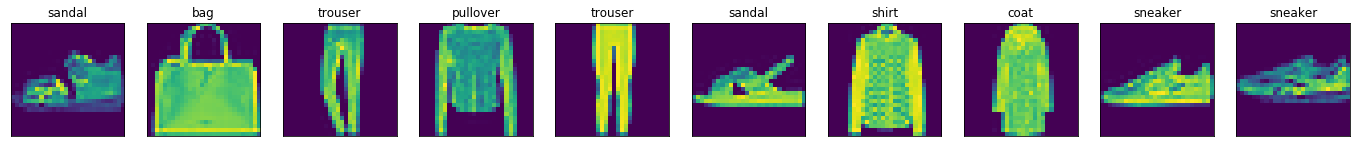

In [12]:
# visualize image set
show_num = 10
i = 0
_, figs = plt.subplots(1, show_num, figsize=(24, 24))
for sample_X, sample_y in train_iter:
    break
for image_pixel, image_label in zip(sample_X, sample_y):
    # 不会自动换行
    if i >= show_num:
        break
    f = figs[i]
    f.imshow(image_pixel.reshape((28, 28)).asnumpy())
    f.set_title(get_fashion_mnist_label(image_label.asscalar()))
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
    i += 1

In [15]:
sample_X[0].shape

(1, 28, 28)

In [26]:
context = get_ctx()
lr, num_epochs = 0.9, 100
lenet.initialize(force_reinit=True, ctx=context, init=init.Xavier())
trainer = gluon.Trainer(lenet.collect_params(), 'sgd', {'learning_rate': lr})
train_cnn(lenet, train_iter, test_iter, batch_size, trainer, context, num_epochs)

training on cpu(0)
epoch 1, loss 2.3159, train acc 0.105, test acc 0.100, time 16.6 sec
epoch 2, loss 1.4244, train acc 0.443, test acc 0.609, time 15.1 sec
epoch 3, loss 0.8718, train acc 0.658, test acc 0.719, time 15.4 sec
epoch 4, loss 0.7152, train acc 0.718, test acc 0.728, time 25.9 sec
epoch 5, loss 0.6367, train acc 0.745, test acc 0.754, time 25.8 sec
epoch 6, loss 0.5756, train acc 0.772, test acc 0.793, time 17.0 sec
epoch 7, loss 0.5285, train acc 0.792, test acc 0.809, time 18.4 sec
epoch 8, loss 0.4928, train acc 0.808, test acc 0.830, time 17.8 sec
epoch 9, loss 0.4648, train acc 0.823, test acc 0.834, time 17.2 sec
epoch 10, loss 0.4454, train acc 0.832, test acc 0.847, time 16.0 sec
epoch 11, loss 0.4247, train acc 0.840, test acc 0.841, time 18.4 sec
epoch 12, loss 0.4121, train acc 0.846, test acc 0.850, time 21.8 sec
epoch 13, loss 0.3994, train acc 0.852, test acc 0.858, time 25.0 sec
epoch 14, loss 0.3861, train acc 0.858, test acc 0.867, time 26.0 sec
epoch 15, 

In [30]:
alexnet = nn.Sequential()
alexnet.add(nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
        nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步增大了输出通道数。
        # 前两个卷积层后不使用池化层来减小输入的高和宽
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 这里全连接层的输出个数比LeNet中的大数倍。使用丢弃层来缓解过拟合
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        # 输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
        nn.Dense(10))

In [34]:
X = nd.random.uniform(shape=(1, 1, 224, 224))
alexnet.initialize(force_reinit=True)
for layer in alexnet:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv4 output shape:	 (1, 96, 54, 54)
pool4 output shape:	 (1, 96, 26, 26)
conv5 output shape:	 (1, 256, 26, 26)
pool5 output shape:	 (1, 256, 12, 12)
conv6 output shape:	 (1, 384, 12, 12)
conv7 output shape:	 (1, 384, 12, 12)
conv8 output shape:	 (1, 256, 12, 12)
pool6 output shape:	 (1, 256, 5, 5)
dense6 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense7 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense8 output shape:	 (1, 10)


In [35]:
batch_size = 128
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

Process ForkPoolWorker-20:
Process ForkPoolWorker-17:
Process ForkPoolWorker-23:
Process ForkPoolWorker-22:
Process ForkPoolWorker-19:
Process ForkPoolWorker-18:
Process ForkPoolWorker-24:
Process ForkPoolWorker-21:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr

KeyboardInterrupt


In [38]:
lr, num_epochs = 0.01, 5
alexnet.initialize(force_reinit=True, ctx=context, init=init.Xavier())
trainer = gluon.Trainer(alexnet.collect_params(), 'sgd', {'learning_rate': lr})
train_cnn(alexnet, train_iter, test_iter, batch_size, trainer, context, num_epochs)

training on cpu(0)


KeyboardInterrupt: 

In [42]:
# VGG
def vgg_block(num_convs, num_channels):
    block = nn.Sequential()
    for _ in range(num_convs):
        block.add(nn.Conv2D(
            num_channels, kernel_size=3, padding=1, activation='relu'))
    block.add(nn.MaxPool2D(pool_size=2, strides=2))
    return block

In [43]:
def vgg(conv_arch):
    net = nn.Sequential()
    # 卷积层部分
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # 全连接层部分
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

In [44]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vggnet = vgg(conv_arch)

In [47]:
vggnet.initialize(force_reinit=True)
X = nd.random.uniform(shape=(1, 1, 224, 224))
for blk in vggnet:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)

sequential7 output shape:	 (1, 64, 112, 112)
sequential8 output shape:	 (1, 128, 56, 56)
sequential9 output shape:	 (1, 256, 28, 28)
sequential10 output shape:	 (1, 512, 14, 14)
sequential11 output shape:	 (1, 512, 7, 7)
dense9 output shape:	 (1, 4096)
dropout2 output shape:	 (1, 4096)
dense10 output shape:	 (1, 4096)
dropout3 output shape:	 (1, 4096)
dense11 output shape:	 (1, 10)


In [48]:
def nin_block(num_channels, kernel_size, strides, padding):
    blk = nn.Sequential()
    blk.add(nn.Conv2D(num_channels, kernel_size,
                      strides, padding, activation='relu'),
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'),
            nn.Conv2D(num_channels, kernel_size=1, activation='relu'))
    return blk

In [49]:
netinet = nn.Sequential()
netinet.add(nin_block(96, kernel_size=11, strides=4, padding=0),
        nn.MaxPool2D(pool_size=3, strides=2),
        nin_block(256, kernel_size=5, strides=1, padding=2),
        nn.MaxPool2D(pool_size=3, strides=2),
        nin_block(384, kernel_size=3, strides=1, padding=1),
        nn.MaxPool2D(pool_size=3, strides=2), nn.Dropout(0.5),
        # 标签类别数是10
        nin_block(10, kernel_size=3, strides=1, padding=1),
        # 全局平均池化层将窗口形状自动设置成输入的高和宽
        nn.GlobalAvgPool2D(),
        # 将四维的输出转成二维的输出，其形状为(批量大小, 10)
        nn.Flatten())

In [50]:
X = nd.random.uniform(shape=(1, 1, 224, 224))
netinet.initialize(force_reinit=True)
for layer in netinet:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential13 output shape:	 (1, 96, 54, 54)
pool12 output shape:	 (1, 96, 26, 26)
sequential14 output shape:	 (1, 256, 26, 26)
pool13 output shape:	 (1, 256, 12, 12)
sequential15 output shape:	 (1, 384, 12, 12)
pool14 output shape:	 (1, 384, 5, 5)
dropout4 output shape:	 (1, 384, 5, 5)
sequential16 output shape:	 (1, 10, 5, 5)
pool15 output shape:	 (1, 10, 1, 1)
flatten0 output shape:	 (1, 10)


In [ ]:
lr, num_epochs, batch_size = 0.1, 5, 128
net.initialize(force_reinit=True, ctx=context, init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)
train_cnn(netinet, train_iter, test_iter, batch_size, trainer, context, num_epochs)

In [65]:
class Inception(nn.Block):
    """
    c1 - c4为每条线路里的层的输出通道数
    这种forward 怎么反向计算
    """
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1 x 1卷积层
        self.p1_1 = nn.Conv2D(c1, kernel_size=1, activation='relu')
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2D(c2[0], kernel_size=1, activation='relu')
        self.p2_2 = nn.Conv2D(c2[1], kernel_size=3, padding=1,
                              activation='relu')
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2D(c3[0], kernel_size=1, activation='relu')
        self.p3_2 = nn.Conv2D(c3[1], kernel_size=5, padding=2,
                              activation='relu')
        # 线路4，3 x 3最大池化层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2D(pool_size=3, strides=1, padding=1)
        self.p4_2 = nn.Conv2D(c4, kernel_size=1, activation='relu')

    def forward(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        return nd.concat(p1, p2, p3, p4, dim=1)  # 在通道维上连结输出

In [66]:
# GoogleNet: 主体卷积部分有5个 模块
block_1 = nn.Sequential()
block_1.add(
    nn.Conv2D(64, kernel_size=7, strides=2, padding=3, activation='relu'),
    nn.MaxPool2D(pool_size=3, strides=2, padding=1)
)

In [67]:
block_2 = nn.Sequential()
block_2.add(
    nn.Conv2D(64, kernel_size=1, activation='relu'),
    nn.Conv2D(192, kernel_size=3, padding=1, activation='relu'),  # 通道数增大3倍
    nn.MaxPool2D(pool_size=3, strides=2, padding=1)
)

In [68]:
# 第三模块: 2个inception
block_3 = nn.Sequential()
block_3.add(
    Inception(64, (96, 128), (16, 32), 32),
    Inception(128, (128, 192), (32, 96), 64),
    nn.MaxPool2D(pool_size=3, strides=2, padding=1)
)

In [69]:
block_4 = nn.Sequential()
block_4.add(
    Inception(192, (96, 208), (16, 48), 64),
    Inception(160, (112, 224), (24, 64), 64),
    Inception(128, (128, 256), (24, 64), 64),
    Inception(112, (144, 288), (32, 64), 64),
    Inception(256, (160, 320), (32, 128), 128),
    nn.MaxPool2D(pool_size=3, strides=2, padding=1)
)

In [70]:
block_5 = nn.Sequential()
block_5.add(
    Inception(256, (160, 320), (32, 128), 128),
    Inception(384, (192, 384), (48, 128), 128),
    nn.GlobalAvgPool2D()
)

In [71]:
google_net = nn.Sequential()
google_net.add(
    block_1,
    block_2,
    block_3,
    block_4,
    block_5,
    nn.Dense(10)
)

In [72]:
X = nd.random.uniform(shape=(1, 1, 96, 96))
google_net.initialize(force_reinit=True)
for layer in google_net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential26 output shape:	 (1, 64, 24, 24)
sequential27 output shape:	 (1, 192, 12, 12)
sequential28 output shape:	 (1, 480, 6, 6)
sequential29 output shape:	 (1, 832, 3, 3)
sequential30 output shape:	 (1, 1024, 1, 1)
dense14 output shape:	 (1, 10)


In [ ]:
# 不敢执行, 悲哀
lr, num_epochs, batch_size = 0.1, 5, 128
google_net.initialize(force_reinit=True, ctx=context, init=init.Xavier())
trainer = gluon.Trainer(google_net.collect_params(), 'sgd', {'learning_rate': lr})
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=96)
train_cnn(net, train_iter, test_iter, batch_size, trainer, context, num_epochs)

In [108]:
# batch normalization
# 批量归一化 的 backward怎么算
# BN from scratch, without mxnet BacthNorm Class
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    """
    通过autograd来判断当前模式是训练模式还是预测模式
    在预测模式下, 使用移动平均和 移动方差, 保证模型对于任意输入都有稳定的输出
    :param X: 
    :param gamma: 拉伸系数
    :param beta: 偏移系数
    :param moving_mean: 移动平均, 估算整个训练数据集的样本均值
    :param moving_var: 移动方差
    :param eps: 小数, 避免分母为0
    :parma momentum: 
    """
    if not autograd.is_training():
        # 在 预测 测试集时(预测模式), 直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / nd.sqrt(moving_var + eps)
        return gamma * X_hat, moving_mean, moving_var   # 拉伸和偏移
    if len(X.shape) == 2:
        # 全连接层
        mean = X.mean(axis=0)  # 列
        var = ((X - mean) ** 2).mean(axis=0)
    elif len(X.shape) == 4:
        mean = X.mean(axis=(0,2,3), keepdims=True)
        var = ((X - mean) ** 2).mean(axis=(0,2,3), keepdims=True)
    else:
        raise Exception("Unkown X shape: {}".format(X.shape))
    X_hat = (X - mean) / nd.sqrt(var + eps)
    # 更新移动平均的均值和方差做标准化
    moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
    moving_var = momentum * moving_var + (1.0 - momentum) * var
    return gamma * X_hat, moving_mean, moving_var

In [109]:
class BatchNorm(nn.Block):
    def __init__(self, num_features, num_dims, **kwargs):
        super(BatchNorm, self).__init__(**kwargs)
        if num_dims == 2:  # 全连接层
            shape = (1, num_features)
        else:
            # 卷积层
            shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成1和0
        self.gamma = self.params.get('gamma', shape=shape, init=init.One())
        self.beta = self.params.get('beta', shape=shape, init=init.Zero())
        # 不参与求梯度和迭代的变量，全在内存上初始化成0
        self.moving_mean = nd.zeros(shape)
        self.moving_var = nd.zeros(shape)

    def forward(self, X):
        # 如果X不在内存上，将moving_mean和moving_var复制到X所在显存上
        if self.moving_mean.context != X.context:
            self.moving_mean = self.moving_mean.copyto(X.context)
            self.moving_var = self.moving_var.copyto(X.context)
        # 保存更新过的moving_mean和moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma.data(), self.beta.data(), self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

In [110]:
lenet_with_bn = nn.Sequential()
lenet_with_bn.add(
    # 卷积层
    nn.Conv2D(6, kernel_size=5),
    BatchNorm(6, num_dims=4),  # 也可以使用 nn.BatchNorm()
    nn.Activation('sigmoid'),
    nn.MaxPool2D(pool_size=2, strides=2),
    
    nn.Conv2D(16, kernel_size=5),
    BatchNorm(16, num_dims=4),
    nn.Activation('sigmoid'),
    nn.MaxPool2D(pool_size=2, strides=2),
    # 全连接层
    nn.Dense(120),
    BatchNorm(120, num_dims=2),
    nn.Activation('sigmoid'),
    nn.Dense(84),
    BatchNorm(84, num_dims=2),
    nn.Activation('sigmoid'),
    nn.Dense(10),
)

In [ ]:
lr, num_epochs, batch_size = 1.0, 5, 256
net.initialize(ctx=context, init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_cnn(lenet_with_bn, train_iter, test_iter, batch_size, trainer, context, num_epochs)

In [111]:
class Residual(nn.Block):
    def __init__(self, num_channels, use_1x1conv=False, strides=1, **kwargs):
        super(Residual, self).__init__(**kwargs)
        self.conv1 = nn.Conv2D(num_channels, kernel_size=3, padding=1,
                               strides=strides)
        self.conv2 = nn.Conv2D(num_channels, kernel_size=3, padding=1)
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = nn.Conv2D(num_channels, kernel_size=1, strides=strides)
        self.bn1 = nn.BatchNorm()
        self.bn2 = nn.BatchNorm()

    def forward(self, X):
        Y = nd.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        return nd.relu(Y + X)

    
def resnet_block(num_channels, num_residuals, first_block=False):
    blk = nn.Sequential()
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.add(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.add(Residual(num_channels))
    return blk

In [112]:
res_block = Residual(3)
res_block.initialize()
X = nd.random.uniform(shape=(4, 3, 6, 6))
res_block(X).shape == X.shape

True

In [113]:
# 增加输出通道数, 并且减半宽和高, 使用1x1卷积层resize
res_block = Residual(6, use_1x1conv=True, strides=2)
res_block.initialize()
res_block(X).shape

(4, 6, 3, 3)

In [114]:
# ResNet模型
res_net = nn.Sequential()
res_net.add(
    nn.Conv2D(64, kernel_size=7, strides=2, padding=3),
    nn.BatchNorm(), 
    nn.Activation('relu'),
    nn.MaxPool2D(pool_size=3, strides=2, padding=1),
    resnet_block(64, 2, first_block=True),
    resnet_block(128, 2),
    resnet_block(256, 2),
    resnet_block(512, 2),
    nn.GlobalAvgPool2D(),  # 全局平均层
    nn.Dense(10)
)

In [ ]:
lr, num_epochs, batch_size = 0.05, 5, 256
res_net.initialize(force_reinit=True, ctx=context, init=init.Xavier())
trainer = gluon.Trainer(res_net.collect_params(), 'sgd', {'learning_rate': lr})
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
train_cnn(res_net, train_iter, test_iter, batch_size, trainer, context, num_epochs)

In [116]:
# 稠密连接网络
def conv_block(num_channels):
    """
    改良版的 "卷积 + BN + 激活"
    """
    blk = nn.Sequential()
    blk.add(nn.BatchNorm(), nn.Activation('relu'),
            nn.Conv2D(num_channels, kernel_size=3, padding=1))
    return blk


class DenseBlock(nn.Block):
    """
    稠密块
    """
    def __init__(self, num_convs, num_channels, **kwargs):
        super(DenseBlock, self).__init__(**kwargs)
        self.net = nn.Sequential()
        for _ in range(num_convs):
            self.net.add(conv_block(num_channels))

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            X = nd.concat(X, Y, dim=1)  # 在通道维上将输入和输出连结
        return X

    
def transition_block(num_channels):
    """
    过渡层
    """
    blk = nn.Sequential()
    blk.add(nn.BatchNorm(), nn.Activation('relu'),
            nn.Conv2D(num_channels, kernel_size=1),
            nn.AvgPool2D(pool_size=2, strides=2))
    return blk


In [117]:
dense_block = DenseBlock(2, 10)
dense_block.initialize()
X = nd.random.uniform(shape=(4, 3, 8, 8))
Y = dense_block(X)
Y.shape

(4, 23, 8, 8)

In [118]:
tran_block = transition_block(10)
tran_block.initialize()
tran_block(Y).shape

(4, 10, 4, 4)

In [119]:
num_channels, growth_rate = 64, 32  # num_channels为当前的通道数
num_convs_in_dense_blocks = [4, 4, 4, 4]

dense_net = nn.Sequential()
dense_net.add(
    nn.Conv2D(64, kernel_size=7, strides=2, padding=3),
    nn.BatchNorm(), 
    nn.Activation('relu'),
    nn.MaxPool2D(pool_size=3, strides=2, padding=1)
)
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    dense_net.add(DenseBlock(num_convs, growth_rate))
    # 上一个稠密块的输出通道数
    num_channels += num_convs * growth_rate
    # 在稠密块之间加入通道数减半的过渡层
    if i != len(num_convs_in_dense_blocks) - 1:
        num_channels //= 2
        dense_net.add(transition_block(num_channels))
dense_net.add(
    nn.BatchNorm(), 
    nn.Activation('relu'), 
    nn.GlobalAvgPool2D(),
    nn.Dense(10)
)

In [ ]:
lr, num_epochs, batch_size = 0.1, 5, 256
dense_net.initialize(ctx=context, init=init.Xavier())
trainer = gluon.Trainer(dense_net.collect_params(), 'sgd', {'learning_rate': lr})
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=96)
train_cnn(dense_net, train_iter, test_iter, batch_size, trainer, context, num_epochs)

### 练习
1. 尝试基于LeNet构造更复杂的网络来提高分类准确率:
    - 调整卷积窗口大小
    - 输出通道数
    - 激活函数和全连接层输出个数
    - 在优化方面:
        - 尝试不同的学习率、
        - 初始化方法
        - 增加迭代周期
2. 尝试增加迭代周期。跟LeNet的结果相比，AlexNet的结果有什么区别？为什么？
    - Mac跑不动
3. AlexNet对Fashion-MNIST数据集来说可能过于复杂。试着简化模型来使训练更快，同时保证准确率不明显下降
4. 修改批量大小, 观察准确率和内存或显存的变化
5. 为什么NiN块里要有两个 1×1 卷积层？去除其中的一个，观察并分析实验现象
6. 对比AlexNet、VGG和NiN、GoogLeNet的模型参数尺寸。为什么后两个网络可以显著减小模型参数尺寸？
7. GoogLeNet有数个后续版本。尝试实现并运行它们，然后观察实验结果。后续版本:
    - 加入批量归一化层
    - 对Inception块做调整
    - 加入残差连接
8. 能否将批量归一化前的 全连接层/卷积层中的bias参数去掉? 为什么?
    - 去掉bias, 会导致 均值减少bias, 方差不变
9. 和LeNet 相比, 加了BN是不是可以调大learning rate?
10. 尝试将BN层加到LeNet的其他地方, 看看有什么变化
11. 如果不学习拉伸参数和偏移参数, 传参`grad_req='null'`可以避免计算梯度, 结果有什么变化?
12. 如何在训练时使用基于全局平均的均值和方差?
13. 对于比较深的网络， ResNet论文中介绍了一个“瓶颈”架构来降低模型复杂度。尝试实现它.
14. 在ResNet的后续版本里，作者将残差块里的“卷积、批量归一化和激活”结构改成了“批量归一化、激活和卷积”，实现这个改进.
15. DenseNet论文中提到的一个优点是模型参数比ResNet的更小，这是为什么 ?
16. DenseNet被人诟病的一个问题是内存或显存消耗过多。真的会这样吗？可以把输入形状换成 224×224 ，来看看实际的消耗。
17. 实现DenseNet论文中的表1提出的不同版本的DenseNet.